In [50]:
import csv
import random

def load_data(filename, split, training_data = [], test_data = []):
    with open(filename, 'r') as file:
        rows = csv.reader(file)
        res = list(zip(*rows)) #transpose the matrix
        #print(res)
        data_set = list(map(list, zip(*res)))
        #print(data_set)
        #print('Total Data: ', len(data_set))
        
        for x in range(len(data_set)):
            if random.random() < split:
                training_data.append(data_set[x])
            else:
                test_data.append(data_set[x])

training_data = []
test_data = []
load_data('clean_data.csv', 0.44, training_data, test_data)
print('Training: ', len(training_data))
print('Test: ', len(test_data))

Training:  308
Test:  391


In [2]:
import csv
with open("breast-cancer-wisconsin.data","r") as file:
    rdr= csv.reader(file)
    with open("clean_data.csv","w") as result:
        wtr= csv.writer(result)
        for r in rdr:
            wtr.writerow( (r[1], r[2], r[3],r[4], r[5], r[6],r[7], r[8], r[9], r[10]) )

In [3]:
import math

def euclidean_distance(data1, data2, length):
    distance = 0
    for x in range(length):
        v1 = data1[x]
        v2 = data2[x]
        if (v1 == '' or v1 == '?' or v1 == 'NA'):
            v1 = 0
        if (v2 == '' or v2 == '?' or v2 == 'NA'):
            v2 = 0
        distance += pow((float(v1) - float(v2)), 2)
    return math.sqrt(distance)

In [4]:
import operator

def get_neighbors(training_set, test_instance, k):
    distances = []
    length = len(test_instance) - 1
    for x in range(len(training_set)):
        dist = euclidean_distance(test_instance, training_set[x], length)
        distances.append((training_set[x], dist))
        
    distances.sort(key = operator.itemgetter(1))
    neighbors = []
    for x in range(k):
        neighbors.append(distances[x][0])
    return neighbors

In [5]:
#Test our distance, and neighbors function

trainSet= [[2, 2, 2, 'a'],[4,4,4,'b']]
testInstance = [5,5,5]
k = 1
neighbors = get_neighbors(trainSet, testInstance, 1)
print(neighbors)

[[4, 4, 4, 'b']]


In [6]:
import operator

def determine_class(neighbors):
    class_votes = {}
    for x in range(len(neighbors)):
        response = neighbors[x][-1]
        if response in class_votes:
            class_votes[response] += 1
        else:
            class_votes[response] = 1
    sorted_votes = sorted(class_votes.items(), key = operator.itemgetter(1), reverse = True)
    return sorted_votes[0][0]

In [7]:
#Test our determine_class function

neighbors = [[1, 1, 1, 'a'],[2,2,2,b''],[3,3,3,],'b']
response = determine_class(neighbors)
print(response)

a


In [20]:
#Calculate generic accuracy
def get_accuracy(test_data, predictions):
    correct = 0
    for x in range(len(test_data)):
        if test_data[x][-1] is predictions[x]:
            correct += 1
    return (correct/float(len(test_data)) * 100.0)

In [9]:
#Test our get_accuracy function

testSet = [[1, 1, 1, 'a'],[2,2,2,'a'],[3,3,3,'b']]
predictions = ['a', 'a' , 'a']
accuracy = get_accuracy(testSet, predictions)
print(accuracy)

66.66666666666666


In [74]:
def run_knn(k = 3):
    #prepare the data
    training_set = []
    test_set = []
    split = 0.60
    load_data('clean_data.csv', split, training_set, test_set)
    #print('Training Set' , len(training_set))
    #print('Test Set' , len(test_set))
    
    #Predict Class and Calculate Accuracy
    predictions = []
    actual_predict = []
    for x in range(len(test_set)):
        neighbors = get_neighbors(training_set, test_set[x], k)
        result = determine_class(neighbors)
        predictions.append(result)
        #print('Predicted: ', result, ' > Actual: ', test_set[x][-1])
        actual_predict.append([test_set[x][-1], result])
        
    accuracy = get_accuracy(test_set, predictions)
    TN = 1
    FP = 1 
    FN = 1 
    TP = 1
    for i in range(len(actual_predict)):
        if(actual_predict[i][0] == '2'):
            if(actual_predict[i][1] == '2'):
                TN += 1
            elif(actual_predict[i][1] == '4'):
                FP += 1
        elif(actual_predict[i][0] == '4'):
            if(actual_predict[i][1] == '2'):
                FN += 1
            elif(actual_predict[i][1] == '4'):
                TP += 1
        
    #print('TN: ', TN)
    #print('FP: ', FP)
    #print('FN: ', FN)
    #print('TP: ', TP)
    
    ac = (TN + TP) / (TN+TP+FP+FN)
    #print('KNN Accuracy:', ac *100, '%')
    
    tpr = TP / (TP+FN)
    #print('True positive rate:', tpr * 100, '%')
    
    ppv = TP/ (TP+FP)
    #print('Positive predictve value:', ppv * 100, '%')
    
    tnr = TN/ (TN+FP)
    #print('True negative rate:', tnr * 100, '%')
    
    f1_score = 2 * ppv * (tpr / (ppv+tpr))
    #print('F1 Score:', f1_score * 100, '%')
    
    return f1_score

#run_knn()

In [35]:
print('Running KNN with k= 2')
run_knn(2)

Running KNN with k= 2
Total Data:  699
Training Set 427
Test Set 272
TN:  184
FP:  4
FN:  5
TP:  83
KNN Accuracy: 96.73913043478261 %
True positive rate: 94.31818181818183 %
Positive predictve value: 95.40229885057471 %
True negative rate: 97.87234042553192 %
F1 Score: 94.85714285714285 %


In [36]:
print('Running KNN with k= 3')
run_knn(3)

Running KNN with k= 3
Total Data:  699
Training Set 388
Test Set 311
TN:  193
FP:  6
FN:  6
TP:  110
KNN Accuracy: 96.19047619047619 %
True positive rate: 94.82758620689656 %
Positive predictve value: 94.82758620689656 %
True negative rate: 96.98492462311557 %
F1 Score: 94.82758620689656 %


In [37]:
print('Running KNN with k= 4')
run_knn(4)

Running KNN with k= 4
Total Data:  699
Training Set 432
Test Set 267
TN:  163
FP:  5
FN:  10
TP:  93
KNN Accuracy: 94.4649446494465 %
True positive rate: 90.29126213592234 %
Positive predictve value: 94.89795918367348 %
True negative rate: 97.02380952380952 %
F1 Score: 92.53731343283582 %


In [38]:
print('Running KNN with k= 5')
run_knn(5)

Running KNN with k= 5
Total Data:  699
Training Set 404
Test Set 295
TN:  186
FP:  6
FN:  6
TP:  101
KNN Accuracy: 95.9866220735786 %
True positive rate: 94.39252336448598 %
Positive predictve value: 94.39252336448598 %
True negative rate: 96.875 %
F1 Score: 94.39252336448598 %


In [39]:
print('Running KNN with k= 6')
run_knn(6)

Running KNN with k= 6
Total Data:  699
Training Set 406
Test Set 293
TN:  187
FP:  5
FN:  5
TP:  100
KNN Accuracy: 96.63299663299664 %
True positive rate: 95.23809523809523 %
Positive predictve value: 95.23809523809523 %
True negative rate: 97.39583333333334 %
F1 Score: 95.23809523809523 %


In [43]:
print('Running KNN with k= 7')
run_knn(7)

Running KNN with k= 7
Total Data:  699
Training Set 455
Test Set 244
TN:  159
FP:  4
FN:  5
TP:  80
KNN Accuracy: 96.37096774193549 %
True positive rate: 94.11764705882352 %
Positive predictve value: 95.23809523809523 %
True negative rate: 97.54601226993866 %
F1 Score: 94.67455621301775 %


In [40]:
print('Running KNN with k= 8')
run_knn(8)

Running KNN with k= 8
Total Data:  699
Training Set 421
Test Set 278
TN:  185
FP:  7
FN:  2
TP:  88
KNN Accuracy: 96.80851063829788 %
True positive rate: 97.77777777777777 %
Positive predictve value: 92.63157894736842 %
True negative rate: 96.35416666666666 %
F1 Score: 95.13513513513513 %


In [41]:
print('Running KNN with k= 17')
run_knn(17)

Running KNN with k= 17
Total Data:  699
Training Set 423
Test Set 276
TN:  176
FP:  6
FN:  9
TP:  89
KNN Accuracy: 94.64285714285714 %
True positive rate: 90.81632653061224 %
Positive predictve value: 93.6842105263158 %
True negative rate: 96.7032967032967 %
F1 Score: 92.2279792746114 %


In [42]:
print('Running KNN with k= 33')
run_knn(33)

Running KNN with k= 33
Total Data:  699
Training Set 439
Test Set 260
TN:  163
FP:  6
FN:  9
TP:  86
KNN Accuracy: 94.31818181818183 %
True positive rate: 90.52631578947368 %
Positive predictve value: 93.47826086956522 %
True negative rate: 96.44970414201184 %
F1 Score: 91.97860962566847 %


[0.940959409594096, 0.9578947368421052, 0.950530035335689, 0.9527272727272728, 0.9492753623188406, 0.9350180505415162, 0.9409722222222222, 0.9602888086642599, 0.9528985507246377]


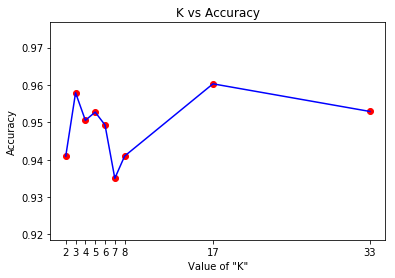

In [69]:
import matplotlib.pyplot as plt

k_array = [2, 3, 4, 5, 6, 7, 8, 17, 33]
result_array = []
for v in k_array:
    result_array.append(run_knn(k))
print(result_array)

plt.scatter(k_array,result_array,c='red')
plt.plot(k_array, result_array, c = 'blue')

plt.xticks(k_array)
plt.xlabel('Value of "K"')
plt.ylabel('Accuracy')
plt.title('K vs Accuracy')
plt.show()

[0.9357798165137615, 0.9368421052631579, 0.9072164948453608, 0.9065420560747663, 0.900990099009901, 0.9108910891089109, 0.9215686274509803, 0.8924731182795699, 0.9270833333333334]


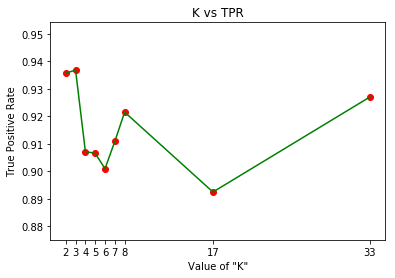

In [71]:
import matplotlib.pyplot as plt

k_array = [2, 3, 4, 5, 6, 7, 8, 17, 33]
result_array = []
for v in k_array:
    result_array.append(run_knn(k))
print(result_array)

plt.scatter(k_array,result_array,c='red')
plt.plot(k_array, result_array, c = 'green')

plt.xticks(k_array)
plt.xlabel('Value of "K"')
plt.ylabel('True Positive Rate')
plt.title('K vs TPR')
plt.show()

[0.9361702127659575, 0.92, 0.941747572815534, 0.975, 0.9454545454545454, 0.9032258064516129, 0.9347826086956522, 0.8888888888888888, 0.9292929292929293]


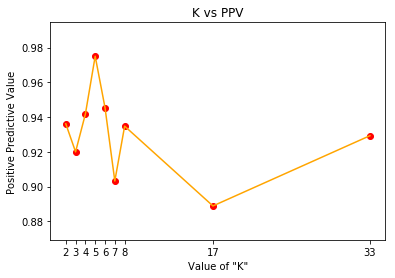

In [73]:
import matplotlib.pyplot as plt

k_array = [2, 3, 4, 5, 6, 7, 8, 17, 33]
result_array = []
for v in k_array:
    result_array.append(run_knn(k))
print(result_array)

plt.scatter(k_array,result_array,c='red')
plt.plot(k_array, result_array, c = 'orange')

plt.xticks(k_array)
plt.xlabel('Value of "K"')
plt.ylabel('Positive Predictive Value')
plt.title('K vs PPV')
plt.show()

[0.9221556886227545, 0.9119170984455958, 0.9387755102040816, 0.9214659685863874, 0.9186602870813396, 0.9333333333333333, 0.9134615384615384, 0.9108910891089109, 0.9497716894977168]


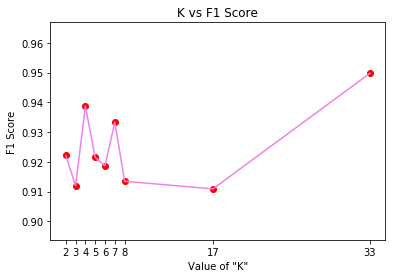

In [75]:
import matplotlib.pyplot as plt

k_array = [2, 3, 4, 5, 6, 7, 8, 17, 33]
result_array = []
for v in k_array:
    result_array.append(run_knn(k))
print(result_array)

plt.scatter(k_array,result_array,c='red')
plt.plot(k_array, result_array, c = 'violet')

plt.xticks(k_array)
plt.xlabel('Value of "K"')
plt.ylabel('F1 Score')
plt.title('K vs F1 Score')
plt.show()